<a href="https://colab.research.google.com/github/omidmno2/stockMarketPrediction_DL/blob/main/Bama_36x20_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Getting Data from GitHub
!wget --no-check-certificate \
    https://github.com/omidmno2/stockMarketPrediction_DL/raw/main/tse_en.csv \
    -o /tmp/tse_en.csv

In [ ]:
# Import required libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
# Select the desired symbol
df = pd.read_csv("tse_en.csv")
df[df.Symbol == "كاما"].head()

,Date,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
1,2008-12-06,كاما,باما,2580,2657,2657,2605,25,2656.0,2657.0,14,21000,55793000
91,2008-12-07,كاما,باما,2605,2683,2565,2641,36,2565.0,2683.0,18,35139,93799687
271,2008-12-08,كاما,باما,2641,2571,2591,2596,-45,2569.0,2621.0,25,42835,110269609
356,2008-12-10,كاما,باما,2596,2571,2565,2586,-10,2519.0,2571.0,7,10557,26763973
467,2008-12-13,كاما,باما,2586,2509,2557,2573,-13,2509.0,2557.0,8,20845,53055381


In [ ]:
# Data cleaning
bama = df[df.Symbol == "كاما"]
bama.index = pd.to_datetime(bama['Date'])
bama = bama.drop(columns=['Symbol', 'Name', 'Date']).dropna()
bama = bama.head(2450)

In [ ]:
bama

,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
Date,,,,,,,,,,
2008-12-06,2580,2657,2657,2605,25,2656.0,2657.0,14,21000,55793000
2008-12-07,2605,2683,2565,2641,36,2565.0,2683.0,18,35139,93799687
2008-12-08,2641,2571,2591,2596,-45,2569.0,2621.0,25,42835,110269609
2008-12-10,2596,2571,2565,2586,-10,2519.0,2571.0,7,10557,26763973
2008-12-13,2586,2509,2557,2573,-13,2509.0,2557.0,8,20845,53055381
...,...,...,...,...,...,...,...,...,...,...
2020-03-17,27638,26500,27510,27322,-316,26500.0,27638.0,1008,2483603,67856023530
2020-03-18,27322,28501,28499,28154,832,27650.0,28591.0,1925,3103741,87384211185
2020-03-24,28154,27100,26747,26807,-1347,26747.0,28154.0,1823,4839909,129742289048


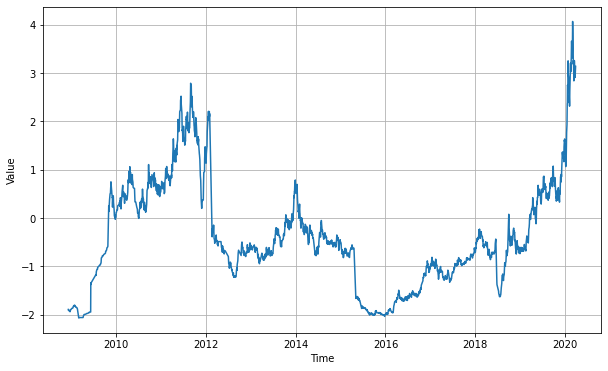

In [ ]:
from sklearn.preprocessing import StandardScaler

series = bama['Last'].values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

series = np.array(series)
time = np.array(bama['Last'].index)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

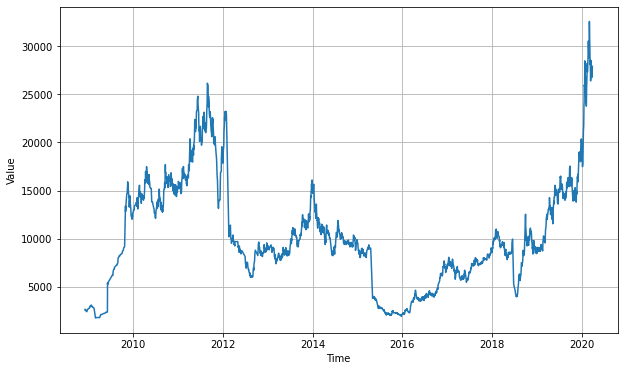

In [ ]:
# Data plotting
series = np.array(bama["Last"])
time = np.array(bama.index)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [ ]:
# Installing required libraries for Technical Analysis
!pip install ta
!pip install pandas_ta

  Created wheel for ta: filename=ta-0.8.0-py3-none-any.whl size=28895 sha256=4d12b4a876893304b502a9b78842cd43f5ac70250874dff9f0b95e57d8e92e0f
  Stored in directory: /root/.cache/pip/wheels/7e/da/86/65cba22446ae2ef148de2079907264ef27feecfb7f51a45e0d
Successfully built ta
     |████████████████████████████████| 115 kB 5.5 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=a9593be75e2b11f529c88efa6a81a1e774c8f0208cf3cf1c09dbc74fd9cde09d
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import ta
#https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#volatility-indicators
#bama = ta.add_all_ta_features(bama, open="Open", high="High", low="Low", close="Close", volume="Volume")

import pandas_ta
#https://github.com/twopirllc/pandas-ta

#import talib
#https://github.com/mrjbq7/ta-lib
#https://ta-lib.org/function.html

In [ ]:
# I1 = xo(t), Open Price
open_price = []
for i in range(len(bama)-19):
    open_price.append(bama.Open[i:i+20])
    
# I2 = xh(t), High Price
high_price = []
for i in range(len(bama)-19):
    high_price.append(bama.High[i:i+20])
    
# I3 = xl(t), Low Price
low_price = []
for i in range(len(bama)-19):
    low_price.append(bama.Low[i:i+20])
    
# I4 = x(t), Close Price
close_price = []
for i in range(len(bama)-19):
    close_price.append(bama.Last[i:i+20])
    
# I5 = MA5, Moving Average 5
ma5 = []
indicator_ma5 = ta.trend.SMAIndicator(close=bama.Last, window=5)
indicator_ma5 = indicator_ma5.sma_indicator()
for i in range(len(bama)-19):
    ma5.append(indicator_ma5[i:i+20])

#  I6 = MA10, Moving Average 10
ma10 = []
indicator_ma10 = ta.trend.SMAIndicator(close=bama.Last, window=10)
indicator_ma10 = indicator_ma10.sma_indicator()
for i in range(len(bama)-19):
    ma10.append(indicator_ma10[i:i+20])
    
# I7 = MA20,  Moving Average 20
ma20 = []
indicator_ma20 = ta.trend.SMAIndicator(close=bama.Last, window=20)
indicator_ma20 = indicator_ma20.sma_indicator()
for i in range(len(bama)-19):
    ma20.append(indicator_ma20[i:i+20])
    
# I8 = BIAS5, BIAS5
bias5 = []
indicator_bias5 = pandas_ta.bias(close=bama.Last, length=5)
for i in range(len(bama)-19):
    bias5.append(indicator_bias5[i:i+20])
    
# I9 = BIAS10, BIAS10
bias10 = []
indicator_bias10 = pandas_ta.bias(close=bama.Last, length=10)
for i in range(len(bama)-19):
    bias10.append(indicator_bias10[i:i+20])
    
# I10 DIFF EMA12-EMA26
diff = []
indicator_ema12 = ta.trend.EMAIndicator(close=bama.Last, window=12)
indicator_ema12 = indicator_ema12.ema_indicator()
indicator_ema26 = ta.trend.EMAIndicator(close=bama.Last, window=26)
indicator_ema26 = indicator_ema26.ema_indicator()
indicator_diff = indicator_ema12 - indicator_ema26
for i in range(len(bama)-19):
    diff.append(indicator_diff[i:i+20])
    
# I11 = BU, (x(t)-bollinger upper)/bollinger upper
bu = []
indicator_bbu = pandas_ta.bbands(close=bama.Last)['BBU_5_2.0']
indicator_bu = (bama.Last - indicator_bbu) / indicator_bbu
for i in range(len(bama)-19):
    bu.append(indicator_bu[i:i+20])
    
# I12 = BL, (x(t)-bollinger lower)/bollinger lower
bl = []
indicator_bbl = pandas_ta.bbands(close=bama.Last)['BBL_5_2.0']
indicator_bl = (bama.Last - indicator_bbl) / indicator_bbl
for i in range(len(bama)-19):
    bl.append(indicator_bl[i:i+20])

# I13 = K, Stochastic Fast %K
k = []
indicator_k = ta.momentum.stochrsi_k(close=bama.Last)
for i in range(len(bama)-19):
    k.append(indicator_k[i:i+20])
    
# I14 = D, Stochastic Fast %D
d = []
indicator_d = ta.momentum.stochrsi_d(close=bama.Last)
for i in range(len(bama)-19):
    d.append(indicator_d[i:i+20])

# I15 = ROC, Price rate of change
roc = []
indicator_roc = ta.momentum.ROCIndicator(close=bama.Last)
indicator_roc = indicator_roc.roc()
for i in range(len(bama)-19):
    roc.append(indicator_roc[i:i+20])
    
# I16 = TR, True range of price movements
tr = []
indicator_tr = pandas_ta.true_range(high=bama.High, low=bama.Low, close=bama.Last)
for i in range(len(bama)-19):
    tr.append(indicator_tr[i:i+20])

# I17 = MTM6, Momentum 6
mtm6 = []
indicator_mtm6 = pandas_ta.mom(close=bama.Last)
for i in range(len(bama)-19):
    mtm6.append(indicator_mtm6[i:i+20])

# I18 = MTM12, Momentum 12
mtm12 = []
indicator_mtm12 = pandas_ta.mom(close=bama.Last)
for i in range(len(bama)-19):
    mtm12.append(indicator_mtm12[i:i+20])
    
# I19 = WR%10, Williams index %10
wr10 = []
indicator_wr10 = ta.momentum.WilliamsRIndicator(high=bama.High, low=bama.Low, close=bama.Last, lbp=10)
indicator_wr10 = indicator_wr10.williams_r()
for i in range(len(bama)-19):
    wr10.append(indicator_wr10[i:i+20])
    
# I20 = WR%5, Williams index %5
wr5 = []
indicator_wr5 = ta.momentum.WilliamsRIndicator(high=bama.High, low=bama.Low, close=bama.Last, lbp=5)
indicator_wr5 = indicator_wr5.williams_r()
for i in range(len(bama)-19):
    wr5.append(indicator_wr5[i:i+20])

# I21 = OSC6, Oscillator 6
osc6 = []
indicator_osc6 = ta.momentum.AwesomeOscillatorIndicator(high=bama.High, low=bama.Low, window1=6)
indicator_osc6 = indicator_osc6.awesome_oscillator()
for i in range(len(bama)-19):
    osc6.append(indicator_osc6[i:i+20])
    
# I22 = OSC12, Oscillator12
osc12 = []
indicator_osc12 = ta.momentum.AwesomeOscillatorIndicator(high=bama.High, low=bama.Low, window1=12)
indicator_osc12 = indicator_osc12.awesome_oscillator()
for i in range(len(bama)-19):
    osc12.append(indicator_osc12[i:i+20])
    
# I23 = RSI6, Relative strength index 6
rsi6 = []
indicator_rsi6 = ta.momentum.RSIIndicator(close=bama.Last, window=6)
indicator_rsi6 = indicator_rsi6.rsi()
for i in range(len(bama)-19):
    rsi6.append(indicator_rsi6[i:i+20]) 
    
# I24 = RSI12, Relative strength index 12
rsi12 = []
indicator_rsi12 = ta.momentum.RSIIndicator(close=bama.Last, window=12)
indicator_rsi12 = indicator_rsi12.rsi()
for i in range(len(bama)-19):
    rsi12.append(indicator_rsi12[i:i+20]) 

# I25 = PSY, Psychological line
psy = []
indicator_psy = pandas_ta.psl(close=bama.Last, open=bama.Open)
for i in range(len(bama)-19):
    psy.append(indicator_psy[i:i+20]) 
    
# I26, K(t)-K(t-1)
i26 = []
indicator_i26 = ta.momentum.stochrsi_k(close=bama.Last.shift(-1)) - ta.momentum.stochrsi_k(close=bama.Last)
for i in range(len(bama)-19):
    i26.append(indicator_i26[i:i+20])
    
# I27, D(t)-D(t-1)
i27 = []
indicator_i27 = ta.momentum.stochrsi_d(close=bama.Last.shift(-1)) - ta.momentum.stochrsi_d(close=bama.Last)
for i in range(len(bama)-19):
    i27.append(indicator_i27[i:i+20])

# I28, (x(t)-x(t-1))/x(t-1)
i28 = []
indicator_i28 = (bama.Last.shift(-1) - bama.Last) / bama.Last
for i in range(len(bama)-19):
    i28.append(indicator_i28[i:i+20])
    
# I29, (x(t)-xo(t))/xo(t)
i29 = []
indicator_i29 = (bama.Last - bama.Open) / bama.Open
for i in range(len(bama)-19):
    i29.append(indicator_i29[i:i+20])
    
# I30, (x(t)-xl(t))/(xh(t)- xl(t))
i30 = []
indicator_i30 = (bama.Last - bama.Low) / (bama.High - bama.Low)
for i in range(len(bama)-19):
    i30.append(indicator_i30[i:i+20])
    
# I31, (MA5(t)-MA5(t-1))/MA5(t-1)
i31 = []
ma5_t = ta.trend.SMAIndicator(close=bama.Last.shift(-1), window=5).sma_indicator()
ma5_t_1 = ta.trend.SMAIndicator(close=bama.Last, window=5).sma_indicator()
indicator_i31 = (ma5_t - ma5_t_1) / ma5_t_1
for i in range(len(bama)-19):
    i31.append(indicator_i31[i:i+20])
    
# I32, (MA20(t)-MA20(t-1))/MA20(t-1)
i32 = []
ma20_t = ta.trend.SMAIndicator(close=bama.Last.shift(-1), window=20).sma_indicator()
ma20_t_1 = ta.trend.SMAIndicator(close=bama.Last, window=20).sma_indicator()
indicator_i32 = (ma20_t - ma20_t_1) / ma20_t_1
for i in range(len(bama)-19):
    i32.append(indicator_i32[i:i+20])
    
# I33, (MA5(t)-MA20(t-1))/MA20(t-1)
i33 = []
indicator_i33 = (ma5_t - ma20_t_1) / ma20_t_1
for i in range(len(bama)-19):
    i33.append(indicator_i33[i:i+20])
    
# I34, (x(t)-MA20(t))/MA20(t)
i34 = []
ma20t = ta.trend.SMAIndicator(close=bama.Last, window=20).sma_indicator()
indicator_i34 = (bama.Last - ma20t) / ma20t
for i in range(len(bama)-19):
    i34.append(indicator_i34[i:i+20])
    
# I35, (x(t)-min(x(t-1),x(t-2),...,x(t-N)))/ min(x(t),x(t-1),x(t-2),...,x(t-N))
i35 = []
max_list = []
min_list = []
for i in range(1, len(bama)):
    max_list.append(bama.Last.shift(-i).max())
    min_list.append(bama.Last.shift(-i).min())
mini = np.array(min_list).min()
maxi = np.array(max_list).max()
indicator_i35 = (bama.Last - mini) / mini
for i in range(len(bama)-19):
    i35.append(indicator_i35[i:i+20])
    
# I36, (x(t)-max(x(t-1),x(t-2),...,x(t-N)))/ max(x(t),x(t-1),x(t-2),...,x(t-N))
i36 = []
indicator_i36 = (bama.Last - maxi) / maxi
for i in range(len(bama)-19):
    i36.append(indicator_i36[i:i+20])

In [ ]:
pictures = list()
for i in range(0, len(open_price)):
    pic = pd.DataFrame(index=['day1', 'day2', 'day3', 'day4', 'day5',
                              'day6', 'day7', 'day8', 'day9', 'day10',
                              'day11', 'day12', 'day13', 'day14', 'day15',
                              'day16', 'day17', 'day18', 'day19', 'day20'])
    pic["Open Price"] = np.array(open_price[i:i+1]).transpose()
    pic["High Price"] = np.array(high_price[i:i+1]).transpose()
    pic["Low Price"] = np.array(low_price[i:i+1]).transpose()
    pic["Close Price"] = np.array(close_price[i:i+1]).transpose()
    pic["MA5"] = np.array(ma5[i:i+1]).transpose()
    pic["MA10"] = np.array(ma10[i:i+1]).transpose()
    pic["MA20"] = np.array(ma20[i:i+1]).transpose()
    pic["BIAS5"] = np.array(bias5[i:i+1]).transpose()
    pic["BIAS10"] = np.array(bias10[i:i+1]).transpose()
    pic["DIFF"] = np.array(diff[i:i+1]).transpose()
    pic["BU"] = np.array(bu[i:i+1]).transpose()
    pic["BL"] = np.array(bl[i:i+1]).transpose()
    pic["K"] = np.array(k[i:i+1]).transpose()
    pic["D"] = np.array(d[i:i+1]).transpose()
    pic["ROC"] = np.array(roc[i:i+1]).transpose()
    pic["TR"] = np.array(tr[i:i+1]).transpose()
    pic["MTM6"] = np.array(mtm6[i:i+1]).transpose()
    pic["MTM12"] = np.array(mtm12[i:i+1]).transpose()
    pic["WR%10"] = np.array(wr10[i:i+1]).transpose()
    pic["WR%5"] = np.array(wr5[i:i+1]).transpose()
    pic["OSC6"] = np.array(osc6[i:i+1]).transpose()
    pic["OSC12"] = np.array(osc12[i:i+1]).transpose()
    pic["RSI6"] = np.array(rsi6[i:i+1]).transpose()
    pic["RSI12"] = np.array(rsi12[i:i+1]).transpose()
    pic["PSY"] = np.array(psy[i:i+1]).transpose()
    pic["I26"] = np.array(i26[i:i+1]).transpose()
    pic["I27"] = np.array(i27[i:i+1]).transpose()
    pic["I28"] = np.array(i28[i:i+1]).transpose()
    pic["I29"] = np.array(i29[i:i+1]).transpose()
    pic["I30"] = np.array(i30[i:i+1]).transpose()
    pic["I31"] = np.array(i31[i:i+1]).transpose()
    pic["I32"] = np.array(i32[i:i+1]).transpose()
    pic["I33"] = np.array(i33[i:i+1]).transpose()
    pic["I34"] = np.array(i34[i:i+1]).transpose()
    pic["I35"] = np.array(i35[i:i+1]).transpose()
    pic["I36"] = np.array(i36[i:i+1]).transpose()
    pictures.append(pic.transpose())

In [ ]:
len(pictures)

2431

In [ ]:
# Algorithm 1
# Labeling (Buy, Sell, Hold)

window_size = 11
counter = 0
bsh_labels = []

window_begin_idx=0
window_end_idx=0
window_middle_idx=0

min_idx=0
max_idx=0
number=0.0
mins=10000.0
maxs=0.0
while counter < len(bama.Last):
    if counter > window_size:
        window_begin_idx = counter - window_size
        window_end_idx = window_begin_idx + window_size - 1
        window_middle_idx = (window_begin_idx + window_end_idx)//2
        for i in range(window_begin_idx, window_end_idx+1):
            number = bama.Last[i]
            if number < mins:
                mins=number
                min_idx = np.where(bama.Last==mins)[0][0]
            if number > maxs:
                maxs=number
                max_idx = np.where(bama.Last==maxs)[0][0]
        if max_idx == window_middle_idx:
            bsh_labels.append(0) #SELL
        elif min_idx == window_middle_idx:
            bsh_labels.append(1) #BUY
        else:
            bsh_labels.append(2) #HOLD  
        mins = 10000.0
        maxs = 0.0
    counter+=1

In [ ]:
len(bsh_labels)

2438

In [ ]:
len(bama.Last)

2450

In [ ]:
len(bama.Last) - len(bsh_labels)
# You should remove 6 rows from head and 6 rows from tail of data or actualy pictures.
# After checking, it was found that this difference is due to the fact that 6 lines from the top and 6 lines from the bottom have been removed.
# شش تای اول و شش تای آخر حذف میشوند موقع درست کردن لیبل

12

In [ ]:
bsh_labels = bsh_labels[13:]
pictures = pictures[:-6]
print(len(bsh_labels))
print(len(pictures))

2425
2425


In [ ]:
pictures = pictures[40:]
bsh_labels = bsh_labels[40:]

In [ ]:
count = 0
for i in range(len(bsh_labels)):
  if bsh_labels[i]==0:
    break
  count += 1
count

95

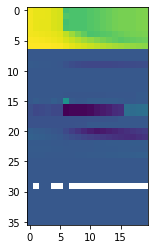

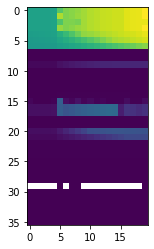

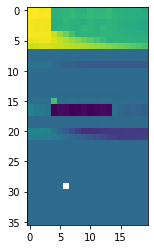

In [ ]:
# 36×20 pixel labeled sample images after image creation phase for algorithm 1
plt.imshow(pictures[0], interpolation='nearest') # Hold
plt.show()
plt.imshow(pictures[95], interpolation='nearest') # Sell
plt.show()
plt.imshow(pictures[598], interpolation='nearest') # Buy
plt.show()

In [ ]:
# Divide the data into training and validation data
split_time = 2000
y_train = bsh_labels[:split_time]
x_train = pictures[:split_time]
y_valid = bsh_labels[split_time:]
x_valid = pictures[split_time:]

In [ ]:
y_train = np.array(y_train)
x_train = np.array(x_train)
y_valid = np.array(y_valid)
x_valid = np.array(x_valid)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_valid = tf.keras.utils.to_categorical(y_valid, 3)

In [ ]:
# Create and train the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(36, 20, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 34, 18, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 16, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 30, 14, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 12, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 6, 128)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 6, 128)        0         
                                                      

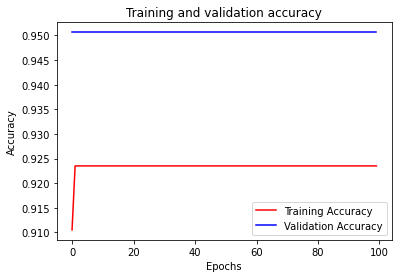

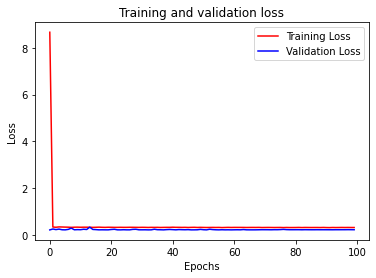

In [ ]:
# Ploting accuracy and loss diagrams
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure().add_subplot(xlabel='Epochs', ylabel='Accuracy')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure().add_subplot(xlabel='Epochs', ylabel='Loss')
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [ ]:
# Test Up and Down labeling method

In [ ]:
bama.head()

,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
Date,,,,,,,,,,
2008-12-06,2580,2657,2657,2605,25,2656.0,2657.0,14,21000,55793000
2008-12-07,2605,2683,2565,2641,36,2565.0,2683.0,18,35139,93799687
2008-12-08,2641,2571,2591,2596,-45,2569.0,2621.0,25,42835,110269609
2008-12-10,2596,2571,2565,2586,-10,2519.0,2571.0,7,10557,26763973
2008-12-13,2586,2509,2557,2573,-13,2509.0,2557.0,8,20845,53055381


In [ ]:
# labeling Up or Down

ud_labels = []

for i in range(1, len(bama.Last)):
    if bama.Last[i] < bama.Last[i-1]:
        ud_labels.append(0) # 0 = Down
    else:
        ud_labels.append(1) # 1 = Up
        
# This method miss first row from data, you should remove first row then train it

In [ ]:
ud_labels = ud_labels[58:-6]
len(ud_labels)

2385

In [ ]:
len(pictures)

2385

In [ ]:
# Divide the data into training and validation data
split_time = 2000
y_train = ud_labels[:split_time]
x_train = pictures[:split_time]
y_valid = ud_labels[split_time:]
x_valid = pictures[split_time:]

y_train = np.array(y_train)
x_train = np.array(x_train)
y_valid = np.array(y_valid)
x_valid = np.array(x_valid)

#y_train = tf.keras.utils.to_categorical(y_train, 2)
#y_valid = tf.keras.utils.to_categorical(y_valid, 2)

In [ ]:
# Create and train the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(36, 20, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='softmax')
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 34, 18, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 16, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 30, 14, 128)       73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 12, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 6, 128)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 14, 6, 128)        0         
                                                      

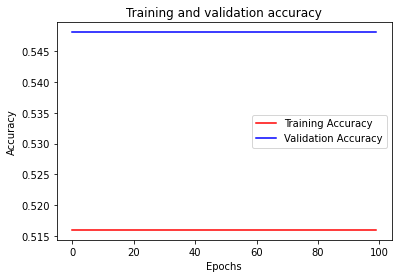

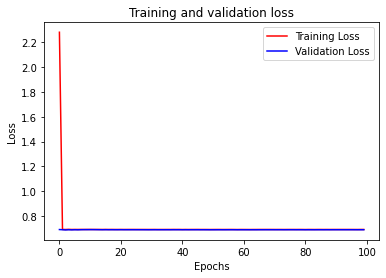

In [ ]:
# Ploting accuracy and loss diagrams
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure().add_subplot(xlabel='Epochs', ylabel='Accuracy')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure().add_subplot(xlabel='Epochs', ylabel='Loss')
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()